# Finance Data Project 

In this data project we will focus on exploratory data analysis of stock prices.We'll focus on bank stocks and see how they progressed throughout the [financial crisis](https://en.wikipedia.org/wiki/Financial_crisis_of_2007%E2%80%9308) all the way to early 2016.

We will use stock information for the following banks:
* Bank of America
* Citigroup
* Goldman Sachs
* JPMorgan Chase
* Morgan Stanley
* Wells Fargo

## Data and Setup

In [1]:
import pandas as pd
import numpy as np
import datetime
%matplotlib inline

In [2]:
bank_stocks = pd.read_pickle('../data/banks-stocks.csv')

In [3]:
bank_stocks.head()

Bank Ticker    BAC                                     C                       \
Stock Info    Open   High    Low  Close    Volume   Open   High    Low  Close   
Date                                                                            
2006-01-03   46.92  47.18  46.15  47.08  16296700  490.0  493.8  481.1  492.9   
2006-01-04   47.00  47.24  46.45  46.58  17757900  488.6  491.0  483.5  483.8   
2006-01-05   46.58  46.83  46.32  46.64  14970900  484.4  487.8  484.0  486.2   
2006-01-06   46.80  46.91  46.35  46.57  12599800  488.8  489.0  482.0  486.2   
2006-01-09   46.72  46.97  46.36  46.60  15620000  486.0  487.4  483.0  483.9   

Bank Ticker           ...     MS                                  WFC         \
Stock Info    Volume  ...   Open   High    Low  Close   Volume   Open   High   
Date                  ...                                                      
2006-01-03   1537660  ...  57.17  58.49  56.74  58.31  5377000  31.60  31.98   
2006-01-04   1871020  ...  58.70  59.28  58.35  58.35  7977800  31.80  31.82   
2006-01-05   1143160  ...  58.55  58.59  58.02  58.51  5778000  31.50  31.56   
2006-01-06   1370250  ...  58.77  58.85  58.05  58.57  6889800  31.58  31.78   
2006-01-09   1680740  ...  58.63  59.29  58.62  59.19  4144500  31.68  31.82   

Bank Ticker                          
Stock Info     Low  Close    Volume  
Date                                 
2006-01-03   31.20  31.90  11016400  
2006-01-04   31.36  31.53  10871000  
2006-01-05   31.31  31.50  10158000  
2006-01-06   31.38  31.68   8403800  
2006-01-09   31.56  31.68   5619600  

[5 rows x 30 columns]

# EDA

## Basic Questions

- What is the max Close price for each bank's stock throughout the time period?

In [4]:
bank_stocks.transpose().xs('Close', level='Stock Info').transpose().max()

Bank Ticker
BAC     54.90
C      564.10
GS     247.92
JPM     70.08
MS      89.30
WFC     58.52
dtype: float64

In [5]:
# Alternative Method 1

tickers = ['BAC', 'C', 'GS', 'JPM', 'MS', 'WFC']
for tick in tickers:
    print(tick,bank_stocks[tick]['Close'].max())

BAC 54.9
C 564.1
GS 247.92
JPM 70.08
MS 89.3
WFC 58.52


In [6]:
# Alternative Method 2

bank_stocks.xs(key='Close',axis=1,level='Stock Info').max()

Bank Ticker
BAC     54.90
C      564.10
GS     247.92
JPM     70.08
MS      89.30
WFC     58.52
dtype: float64

### Understanding the returns

In [7]:
returns = pd.DataFrame()

In [8]:
banks_close = bank_stocks.transpose().xs('Close', level='Stock Info').transpose()

for (columnName, columnData) in banks_close.iteritems():
    returns_column_name = str(columnName) + ' Return'
    returns[returns_column_name] = banks_close[columnName].pct_change()

returns.head()

,BAC Return,C Return,GS Return,JPM Return,MS Return,WFC Return
Date,,,,,,
2006-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-04,-0.010620,-0.018462,-0.013812,-0.014183,0.000686,-0.011599
2006-01-05,0.001288,0.004961,-0.000393,0.003029,0.002742,-0.000951
2006-01-06,-0.001501,0.000000,0.014169,0.007046,0.001025,0.005714
2006-01-09,0.000644,-0.004731,0.012030,0.016242,0.010586,0.000000


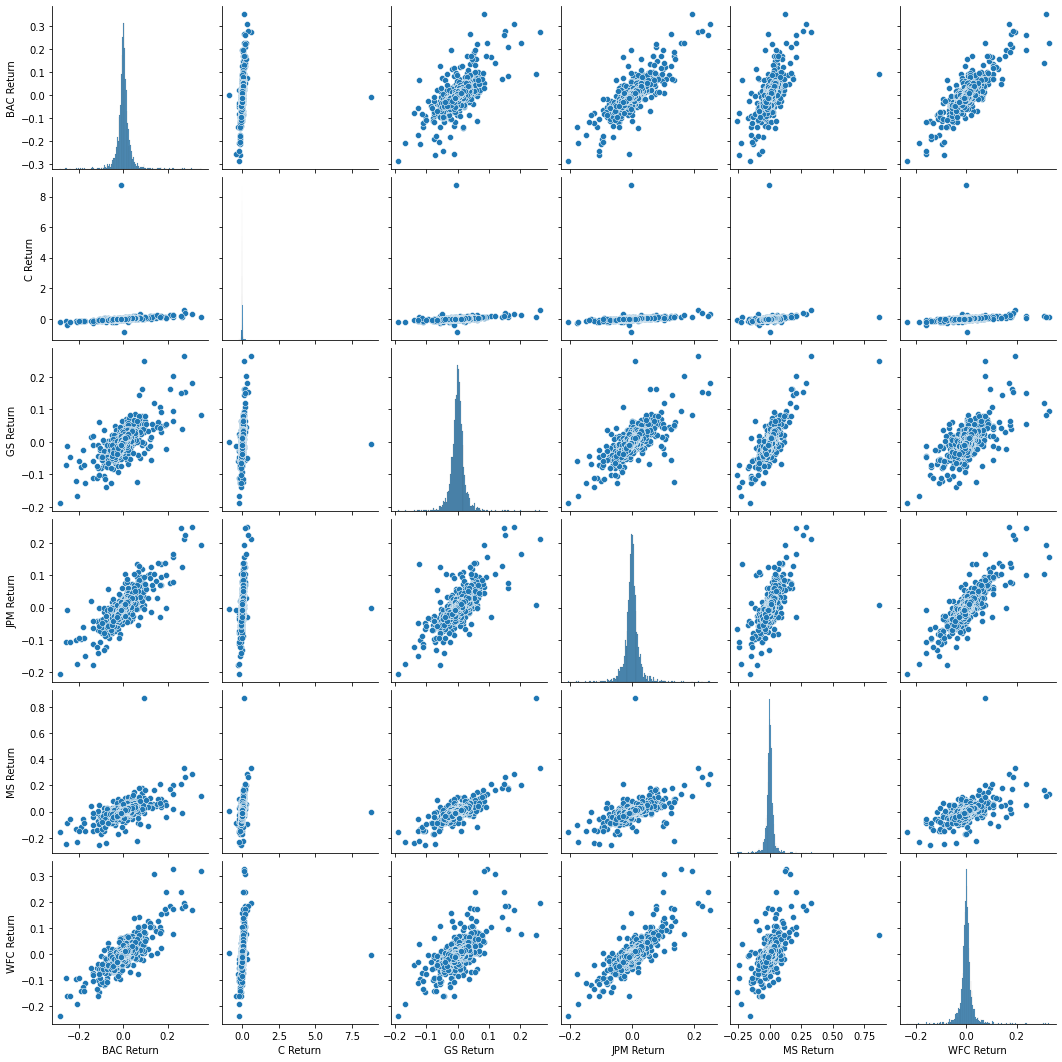

In [9]:
import seaborn as sns
%matplotlib inline

sns.pairplot(returns)
# Citigroup returns never changes
# See https://en.wikipedia.org/wiki/Citigroup#Collapse_and_US_government_intervention_(2008)

- On what dates each bank stock had the best and worst single day returns?

In [10]:
# Worst value
returns.idxmin()

# Inauguration day

BAC Return   2009-01-20
C Return     2011-05-06
GS Return    2009-01-20
JPM Return   2009-01-20
MS Return    2008-10-09
WFC Return   2009-01-20
dtype: datetime64[ns]

In [11]:
# Best value
returns.idxmax()

# Citigroup reverse stock split

BAC Return   2009-04-09
C Return     2011-05-09
GS Return    2008-11-24
JPM Return   2009-01-21
MS Return    2008-10-13
WFC Return   2008-07-16
dtype: datetime64[ns]

- Which stock would you classify as the riskiest over the entire time period?

In [12]:
# Entire period
returns.std()

# Riskiest = Citigroup

BAC Return    0.036650
C Return      0.179969
GS Return     0.025346
JPM Return    0.027656
MS Return     0.037820
WFC Return    0.030233
dtype: float64

/home/brunozimpel/.local/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='C Return', ylabel='Density'>

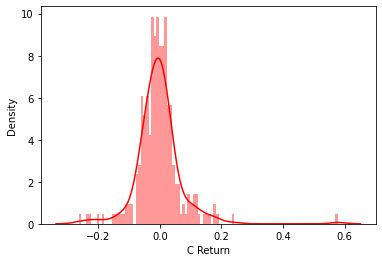

In [13]:
sns.distplot(returns['C Return'].loc['2008'],bins=100,color='red')

- Which would you classify as the riskiest for the year 2015?

In [14]:
# 2015
returns.loc['2015'].std()

# Riskiest = Morgan Stanley

BAC Return    0.016163
C Return      0.015289
GS Return     0.014046
JPM Return    0.014017
MS Return     0.016249
WFC Return    0.012591
dtype: float64

/home/brunozimpel/.local/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='MS Return', ylabel='Density'>

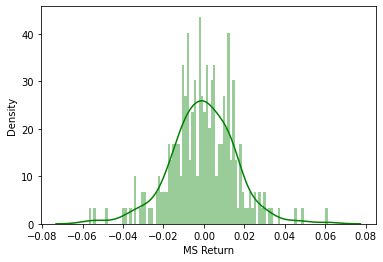

In [15]:
sns.distplot(returns['MS Return'].loc['2015'],bins=100,color='green')

____
# More Visualization



In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline
import plotly
import cufflinks as cf
cf.go_offline()

### Close price for each bank for the entire index of time

<AxesSubplot:xlabel='Date'>

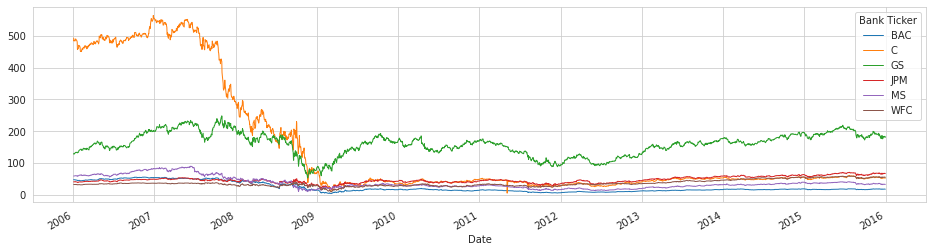

In [17]:
banks_close.plot.line(figsize=(16,4),lw=1)

In [18]:
# Alternative method

bank_stocks.xs(key='Close',axis=1,level='Stock Info').iplot()

-----

### Moving Averages

<AxesSubplot:xlabel='Date'>

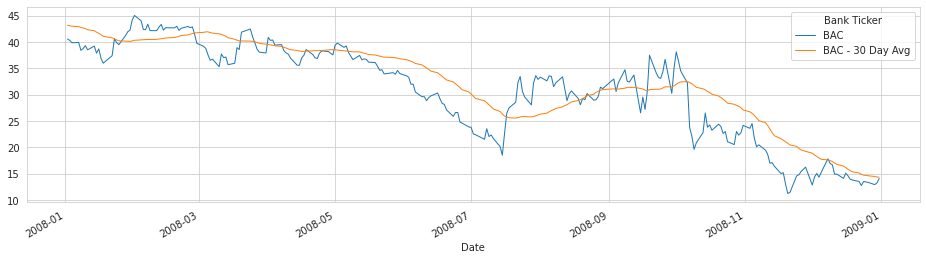

In [19]:
banks_close['BAC - 30 Day Avg'] = banks_close.iloc[:,0].rolling(window=30).mean()
banks_close[['BAC','BAC - 30 Day Avg']].loc['2008'].plot.line(figsize=(16,4),lw=1)

### Heatmap of the correlation between the stocks Close Price

<AxesSubplot:xlabel='Bank Ticker', ylabel='Bank Ticker'>

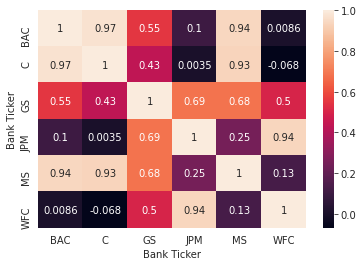

In [20]:
sns.heatmap(banks_close.drop(columns = ['BAC - 30 Day Avg']).corr(),annot=True)

### Clustermap to cluster the correlations together

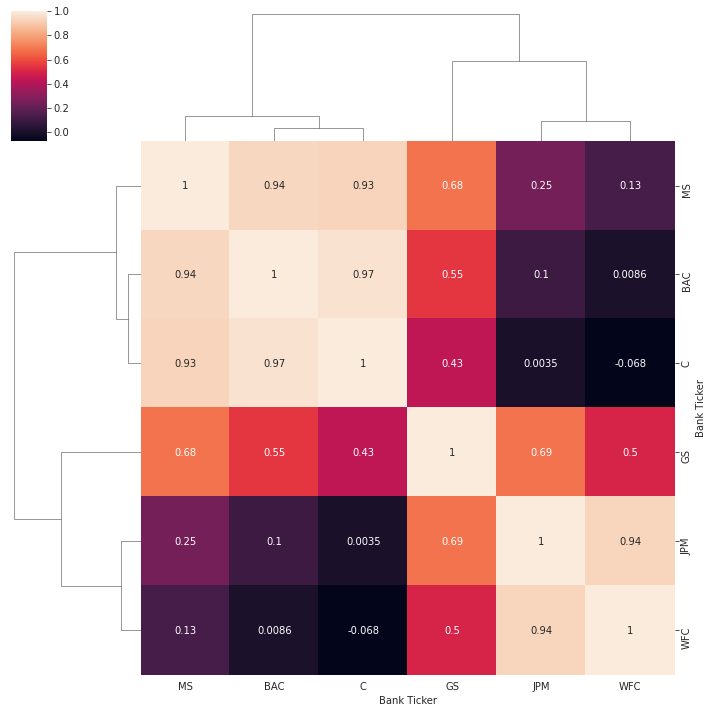

In [21]:
sns.clustermap(banks_close.drop(columns = ['BAC - 30 Day Avg']).corr(),annot=True)

-----

### Cufflinks plots


#### Candle plot of Bank of America's stock from Jan 1st 2015 to Jan 1st 2016

In [22]:
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import cufflinks as cf
init_notebook_mode(connected=True)
cf.go_offline()

In [23]:
bank_stocks['BAC'].loc['2015-1-1':'2016-1-1'].iplot(kind='candle')

#### Simple Moving Averages plot of Morgan Stanley for the year 2015

In [24]:
bank_stocks['MS']['Close'].loc['2015'].ta_plot(study='sma',periods=[13,21,55])

#### Bollinger Band Plot for Bank of America for the year 2015

In [25]:
bank_stocks['BAC']['Close'].loc['2015'].ta_plot(study='boll')